In [4]:
!pip install gensim


In [5]:
import gensim

import gensim.downloader

import pandas as pd

from sklearn.feature_extraction.text import CountVectorizer

from sklearn.decomposition import PCA

import matplotlib.patches as mpatches

import matplotlib.pyplot as plt


Part 1: Word Embeddings

In [6]:
# Load pre-trained Word2Vec model trained on wikipedia data

model = gensim.downloader.load("glove-wiki-gigaword-100")

# Getting the vector for a word

dog = model['dog']

# Getting the most similar words

print(model.most_similar('dog'))

# Getting the similarity between two words

print(model.similarity('dog', 'cat'))

[('cat', 0.8798074126243591), ('dogs', 0.8344309329986572), ('pet', 0.7449564337730408), ('puppy', 0.7236376404762268), ('horse', 0.7109653949737549), ('animal', 0.6817063093185425), ('pig', 0.655417263507843), ('boy', 0.6545307636260986), ('cats', 0.6471933126449585), ('rabbit', 0.6468630433082581)]
0.87980753


Part 1a

In [8]:
#find the most similar words to a word of your choice. 
#Does the result make sense? Look up some of the words if you don't know them
#Share and discuss with your group

juice = model['juice']
print(model.most_similar('juice'))

[('lemon', 0.8233426809310913), ('vinegar', 0.7732073068618774), ('lime', 0.7639415860176086), ('sauce', 0.7204378843307495), ('grapefruit', 0.7199090123176575), ('syrup', 0.7161567807197571), ('yogurt', 0.7134124040603638), ('soda', 0.7080042362213135), ('cream', 0.7028740048408508), ('sugar', 0.7018996477127075)]


Part 1a answer: The results make sense as they were all food-related, with most of the results being juice ingredients. Some of the results were other food items unrelated to juice.

In [9]:

#we can extract a "capital vector" by subtracting the vector for a country from the vector for its capital
capital= model["berlin"]-model['germany']

fra_capital=model["france"]+capital

print(model.most_similar(fra_capital))

#likewise, we can extract a "plural vector" by subtracting the vector for a singular noun from the vector for its plural
plural=model["cats"]-model["cat"]

print(model.most_similar(plural))

#we can also add vectors together
plural_dogs=model["dog"]+plural

print(model.most_similar(plural_dogs))

[('paris', 0.8827143311500549), ('france', 0.755802571773529), ('french', 0.7075165510177612), ('prohertrib', 0.6943174600601196), ('berlin', 0.6665561199188232), ('brussels', 0.6574430465698242), ('lyon', 0.6526200771331787), ('london', 0.64079749584198), ('le', 0.6403627991676331), ('strasbourg', 0.6346526145935059)]
[('lowlanders', 0.4844588041305542), ('zebras', 0.45914992690086365), ('dicots', 0.45332765579223633), ('non-arabs', 0.45208773016929626), ('amerindians', 0.4478238821029663), ('buffalos', 0.4475123882293701), ('giraffes', 0.4466330111026764), ('bavarians', 0.4452260732650757), ('welshmen', 0.4440663158893585), ('dingos', 0.44403281807899475)]
[('dogs', 0.8921768665313721), ('cats', 0.8814380764961243), ('dog', 0.7873795628547668), ('animals', 0.7512702345848083), ('pets', 0.7392118573188782), ('cows', 0.6835324168205261), ('pet', 0.679297685623169), ('horses', 0.6774964332580566), ('pigs', 0.6755765080451965), ('animal', 0.6683686971664429)]


In [10]:
# this can be used to find examples of data bias in word embeddings

# for example, we can find the most similar words to "doctor" and "nurse"

gender=model["woman"]-model["man"]

print(model.most_similar(gender))
print(model.most_similar(-gender))

model.most_similar(model["doctor"]+gender)

[('menstruating', 0.6102039813995361), ('miscarry', 0.5550354719161987), ('lactating', 0.542172908782959), ('pre-eclampsia', 0.5129693746566772), ('uterus', 0.5093088746070862), ('ovulating', 0.5070309042930603), ('miscarried', 0.5043483376502991), ('adoptee', 0.5012543201446533), ('comnena', 0.5012539625167847), ('pulecio', 0.500389039516449)]
[('arsene', 0.4388486444950104), ('ancelotti', 0.42151397466659546), ('nistelrooy', 0.41140034794807434), ('strachan', 0.4089668393135071), ('rafa', 0.40728434920310974), ('technicals', 0.4060872495174408), ('allardyce', 0.4018688201904297), ('boss', 0.40107354521751404), ('rangers', 0.39962300658226013), ('utd', 0.3967454135417938)]


[('doctor', 0.8661209940910339),
 ('nurse', 0.7757077813148499),
 ('physician', 0.7128061652183533),
 ('woman', 0.7089030742645264),
 ('doctors', 0.6793617010116577),
 ('pregnant', 0.6787967085838318),
 ('patient', 0.6772218346595764),
 ('dentist', 0.6694242358207703),
 ('mother', 0.6586815714836121),
 ('medical', 0.6466937065124512)]

Part 1b

In [11]:
#try to isolate a specific dimension in the embeddings and add it to multiple words. 
#does this show any bias or assumptions in the data? 
# Discuss with your group and share most interesting dimension in the document

race=model["black"]-model["race"]

print(model.most_similar(race))
print(model.most_similar(-race))

model.most_similar(model["business"]+race)

[('black', 0.48912182450294495), ('coloured', 0.4793228805065155), ('clad', 0.473660409450531), ('stained', 0.46707868576049805), ('maroon', 0.4585193991661072), ('purple', 0.450435608625412), ('colored', 0.44752559065818787), ('bearded', 0.4471698999404907), ('silvery', 0.42704635858535767), ('berets', 0.4262385368347168)]
[('race', 0.5634858012199402), ('hockenheim', 0.5490911602973938), ('indycar', 0.541210949420929), ('monza', 0.5338013768196106), ('nürburgring', 0.5271561741828918), ('suzuka', 0.5216007828712463), ('races', 0.5000783205032349), ('nurburgring', 0.4993460774421692), ('irl', 0.49865472316741943), ('prix', 0.49588844180107117)]


[('business', 0.6699997186660767),
 ('black', 0.6332972645759583),
 ('corporate', 0.6016422510147095),
 ('businesses', 0.6013487577438354),
 ('small', 0.5787851810455322),
 ('industry', 0.5728737711906433),
 ('companies', 0.5677958726882935),
 ('large', 0.5675168037414551),
 ('private', 0.5619243383407593),
 ('clients', 0.5476332902908325)]

Part 2: Visualization and Embeddings in Space

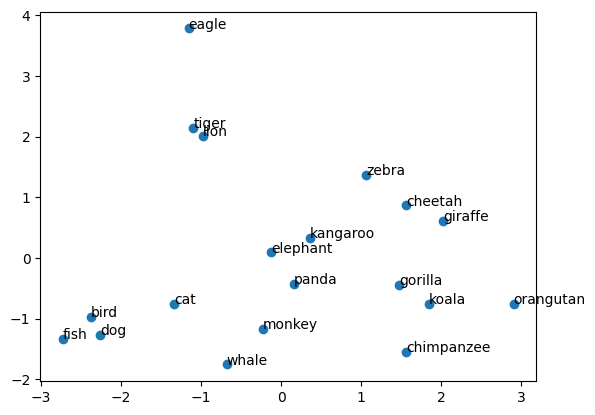

In [12]:
#visualize pca of word embeddings

from sklearn.decomposition import PCA

import matplotlib.pyplot as plt

words=["dog","cat","fish", "whale", "bird", "eagle", "lion", "tiger", "cheetah", "elephant", "giraffe", "zebra", "kangaroo", "koala", "panda", "monkey", "gorilla", "chimpanzee", "orangutan", ]

X=[model[word] for word in words]

#identify clusters of words in the word embeddings at high dimensions

pca=PCA(n_components=2)

X_pca=pca.fit_transform(X)

plt.scatter(X_pca[:,0],X_pca[:,1])

for i, word in enumerate(words):
    plt.annotate(word, (X_pca[i,0],X_pca[i,1]))

plt.show()

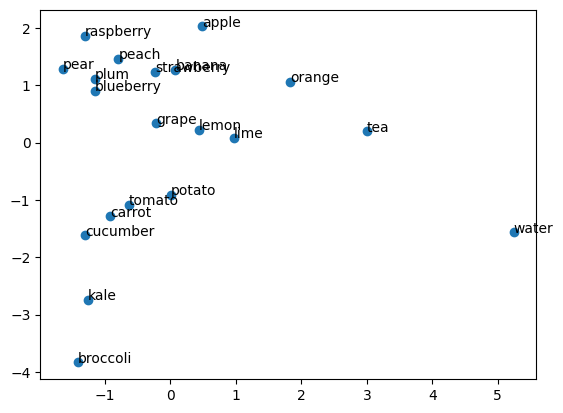

In [13]:
#repeat this process with your own set of 10-20 words. 
#Does the proximity between words and overall distances make sense? Work as a group and discuss your individual findings.

my_words = ["lemon", "lime", "apple", "orange", "tea", "water", "tomato", "potato", "carrot", "cucumber", "banana", "grape", "strawberry", "blueberry", "raspberry", "kale", "broccoli", "peach", "pear", "plum"]

X = [model[word] for word in my_words]

pac = PCA(n_components=2)

X_pca = pca.fit_transform(X)

plt.scatter(X_pca[:,0],X_pca[:,1])

for i, word in enumerate(my_words):
    plt.annotate(word, (X_pca[i,0],X_pca[i,1]))

plt.show()


It looks like the berries and fruits were successfully clustered together. Vegetables were also clustered together, with more leafy veggies (kale) plotted away from other vegetables. Water and tea were outliers, and that was reflected in the embeddings visualization.

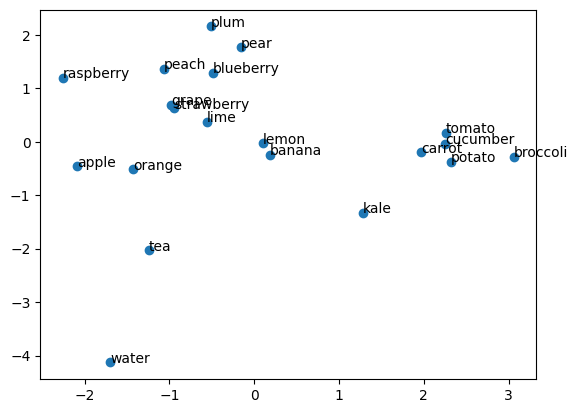

In [14]:
# repeat the process with a different pre-trained model and the same set of words. 
# What has changed in the embedding space? What might this have to do with the training data?
twitter_model= gensim.downloader.load("glove-twitter-100")

X = [twitter_model[word] for word in my_words]

pca = PCA(n_components=2)

X_pca = pca.fit_transform(X)

plt.scatter(X_pca[:,0],X_pca[:,1])

for i, word in enumerate(my_words):
    plt.annotate(word, (X_pca[i,0],X_pca[i,1]))

plt.show()  


This time around, the vegetables were more grouped together and the fruits were a bit more scattered. Water remained an outlier. The training data used for this model probably relies more on what people have tweeted and the prevalence of the listed words on Twitter. For the most part, the embeddings plot the words pretty accurately, but there are differences from the original plot due to the contents of the pre trained twitter model.

Part 3: Embedding reddit posts

In [15]:
#read in uiuc csv
uiuc = pd.read_csv("uiuc.csv")
mich = pd.read_csv("umich.csv")

#sample so we have even number of samples from each dataset
mich = mich.sample(n=4725)

#assign labels based on origin subreddit of comment
uiuc['label']=1
mich['label']=0

#you will be working with the data csv for the rest of the question
data = pd.concat([uiuc,mich])


In [16]:
# using the code from project 1, clean the text and create a bag of words representation of the text

# cleaning function

def clean(text):
    #remove newline and space characters
    text = ' '.join(text.split())
    #convert the text to lowercase
    text = text.lower()
    #remove punctuation
    text = ''.join([char for char in text if char.isalpha() or char.isspace()])
    return text


In [17]:
# clean text

data['cleaned_text'] = data['text'].apply(clean)

In [18]:
#create a bag of words representation with count vectorizer

vectorizer = CountVectorizer()
bag_of_words = vectorizer.fit_transform(data['cleaned_text'])
bag_of_words

<9450x15911 sparse matrix of type '<class 'numpy.int64'>'
	with 221783 stored elements in Compressed Sparse Row format>

In [19]:
bow_df = pd.DataFrame(bag_of_words.toarray(), columns=vectorizer.get_feature_names_out())
bow_df

,aa,aaa,aaaaah,aaabb,aadl,aapd,aata,ab,abandoned,abbreviation,...,zoning,zoo,zoom,zoomed,봉사를,세계로,숭실,진리와,𝓲𝓷𝓼𝓮𝓬𝓾𝓻𝓮,𝘢𝘩𝘦𝘮
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9445,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9446,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9447,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9448,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [20]:
# using the embedding code from last week, plot a pca of all posts in the subreddits data set

pca = PCA(n_components=2)
data_pca = pca.fit_transform(bow_df)

dataDf = pd.DataFrame(data_pca, columns = ['PC1', 'PC2'])
dataDf['label'] = data['label'].values
dataDf

,PC1,PC2,label
0,1.850909,1.332952,1
1,1.745091,-1.430533,1
2,-1.479364,-0.872432,1
3,6.923671,4.696037,1
4,-0.379529,-0.020118,1
...,...,...,...
9445,-0.245614,-0.166025,0
9446,-0.520785,-0.094324,0
9447,-1.959504,-0.085939,0
9448,0.564466,-0.595950,0


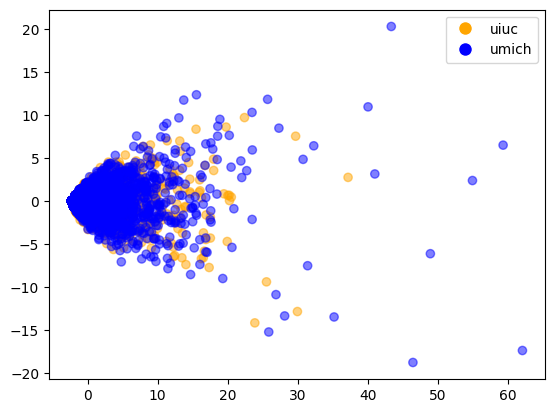

In [21]:
# color by the "label" column to see if the two subreddits are separable in the embedding space

colors = {'uiuc':'orange', 'umich':'blue'}

plt.scatter(dataDf['PC1'], dataDf['PC2'], c=dataDf['label'].apply(lambda x: colors['uiuc'] if x == 1 else colors['umich']), alpha=0.5)

orange = plt.Line2D([0], [0], marker='o', color='w', label='uiuc', markerfacecolor='orange', markersize=10)
blue = plt.Line2D([0], [0], marker='o', color='w', label='umich', markerfacecolor='blue', markersize=10)

plt.legend(handles=[orange, blue])
plt.show()

Is there a clear separation between the two columns? 

There is not a clear separation between the two columns. The uiuc points were plotted first and were in turn overlapped by the michigan subreddit points. It is clear that the embeddings overlap, with more michigan data scattered across the rest of the plot. 

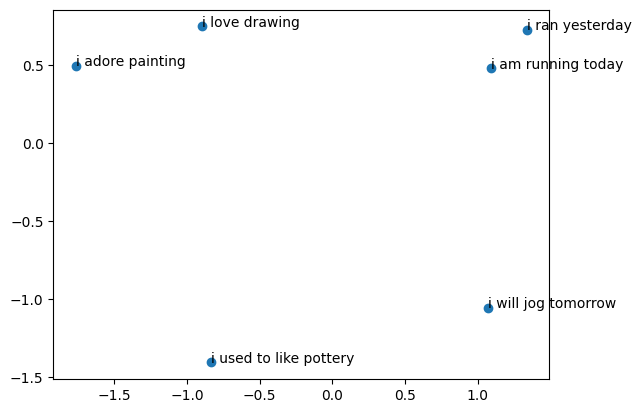

In [22]:
#here is a function to calculate the average embedding of a cleaned document
import numpy as np
#we can sum together all the embeddings to get a representation of all the concepts expressed in the document
def avg_embedding(sentence, model):
    words=sentence.split()
    embeddings=[model[word] for word in words if word in model]
    return np.mean(embeddings, axis=0)

sentences=["i am running today", "i will jog tomorrow", "i ran yesterday", "i love drawing", "i adore painting", "i used to like pottery"]

#we can then calculate the average embedding of each sentence

avg_embeddings=[avg_embedding(sentence, model) for sentence in sentences]

#we can then plot the pca of these embeddings

pca=PCA(n_components=2)

X_pca=pca.fit_transform(avg_embeddings)

plt.scatter(X_pca[:,0],X_pca[:,1])

for i, sentence in enumerate(sentences):
    plt.annotate(sentence, (X_pca[i,0],X_pca[i,1]))

plt.show()

/opt/anaconda3/envs/is310/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/opt/anaconda3/envs/is310/lib/python3.9/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


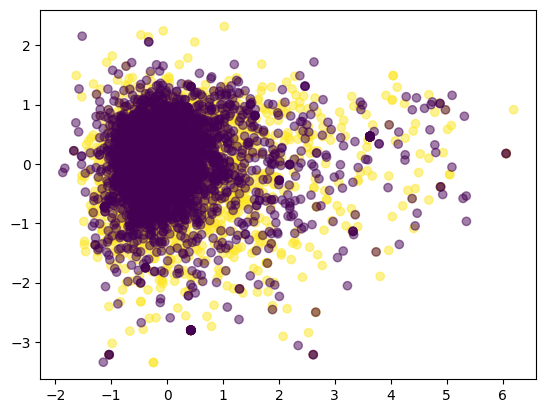

In [23]:
#use this function to calculate the average embedding of each post in the dataset

avg_embeddings = [avg_embedding(post, model) for post in data['cleaned_text']] 
data_avg_embeddings = [embedding for embedding in avg_embeddings if not np.isnan(embedding).any()]
data_avg_embeddings = np.array(data_avg_embeddings)
data_avg_labels = [label for embedding, label in zip(avg_embeddings, data['label']) if not np.isnan(embedding).any()]

#plot the pca of the average embeddings, color by the "label" column

pca = PCA(n_components=2)
X_pca = pca.fit_transform(data_avg_embeddings)

plt.scatter(X_pca[:,0], X_pca[:,1], c=data_avg_labels, alpha=0.5)
plt.show()


How is this plot different from the previous one?

This plot is much more concentrated in one area and ther are less sparse outliers. Everything is closely clustered and the outliers are graudally separated from the main cluster.

Is there clear separation? 

I would say that there is not a clear separation because of how much the points overlap.

Part 4: HuggingFace and BERT

In [24]:
!pip install "transformers[torch]"

In [25]:
#Please wait until after next week to start

# Use a pipeline as a high-level helper
from transformers import pipeline

#download bert model
pipe = pipeline("text-classification", model="finiteautomata/bertweet-base-sentiment-analysis")


emoji is not installed, thus not converting emoticons or emojis into text. Install emoji: pip3 install emoji==0.6.0
Hardware accelerator e.g. GPU is available in the environment, but no `device` argument is passed to the `Pipeline` object. Model will be on CPU.


In [26]:
#use the pipeline to classify the sentiment of a sentence of your choice
pipe("I love this class")

[{'label': 'POS', 'score': 0.9923704862594604}]

In [36]:
# use the pipeline to classify the sentiment of all posts in the reddit dataset 
def sentiment(text):
    try:
        return pipe(text)[0]['label']
    except Exception as e:
        return None

data['sentiment'] = data['cleaned_text'].apply(sentiment)


In [37]:
# report the most common sentiment label
data['sentiment'].value_counts()

sentiment
NEU    5266
NEG    2079
POS    1712
Name: count, dtype: int64

In [44]:
#look at ten sample posts and labels; do you agree with all of them? 
data[['cleaned_text','sentiment']].sample(10)

,cleaned_text,sentiment
4698,ive heard the new labor contract for gsisgssas has had a massive impact on school budgets if youre not a phd student who was guaranteed funding or a graduate student in that school the odds of you getting a spot this year are slim outside of that yes theres very much a political process in gaining a spot id wager even more so now with contract restraints many of us are in the same boat as you do your best to build good relationships with professors now so that you might have a shot in the winter hope you find something,NEU
2765,httpsblogsillinoiseduviewhttpsblogsillinoiseduview,NEU
158,interested,POS
7245,buying msu football,NEU
3814,lmfao this dudes still at it,NEU
5944,they will also cover um tuition the full spg page has more detail,NEU
1139,dm me,NEU
1472,hi im the roommate and im just replying to confirm that i did pick up the bike thank you so so much,POS
3965,fell prey to another energy company last year in a similar fashion hence turned these guys away,NEG
367,if youre caught using a bot youll be forced to register in person at one of the offices,NEG


I would say that most of the ten sample posts were accurately classified. It's hard to define a post as positive, negative, or neutral especially when they are short statements. I agree with all of the posts that were classified as positive, with the exception of "interested" as having a positive sentiment because we do not know the context of the post. I also agree with the two posts that were classified as negative.

In [45]:
#is the UIUC or Michigan subreddit more negative?
data.groupby('label')['sentiment'].value_counts()


label  sentiment
0      NEU          2630
       NEG          1056
       POS           791
1      NEU          2636
       NEG          1023
       POS           921
Name: count, dtype: int64

UIUC label = 1
MICH label = 0

Although the subreddits have similar sentiment numbers, it looks like UIUC had more positive sentiments and slightly less negative sentiments compared to Michigan. 